In [1]:
import numpy as np
import pandas as pd
from math import gamma
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 16
plt.rcParams["axes.axisbelow"] = True

## 一様分布
---
### 概要
- $x$ がどんな値でも密度関数が一定の値をとる.

### 密度関数
$$
\begin{align*}
p(x|a,b) = 
\left\{
\begin{array}{ll}
\frac{1}{b-a} & (a\leq x\leq b) \\
0 & (x< a, b< x)
\end{array}
\right.
\end{align*}
$$

### 期待値
$$
\begin{align*}
\mathrm{E}[x] &= \int_{a}^{b} x \frac{1}{b-a} \mathrm{d}x \\
&= \frac{1}{b-a} \left[\frac{1}{2}x^2\right]^b_a \\
&= \frac{1}{b-a} \frac{1}{2} \left(b^2-a^2\right) \\
&= \frac{1}{2} (a+b)
\end{align*}
$$

### 分散
$$
\begin{align*}
\mathrm{E}[x^2] &= \int_{a}^{b} x^2 \frac{1}{b-a} \mathrm{d}x \\
&= \frac{1}{b-a} \left[\frac{1}{3}x^3\right]^b_a \\
&= \frac{1}{b-a} \frac{1}{3} \left(b^3-a^3\right) \\
&= \frac{1}{3} \left(a^2+ab+b^2 \right)
\end{align*}
$$

$$
\begin{align*}
\mathrm{Var}[x] &= \mathrm{E}[x^2] -  \mathrm{E}[x]^2\\
&= \frac{1}{3} \left(a^2+ab+b^2 \right) -  \frac{1}{4} \left(a^2+2ab+b^2 \right)\\
&= \frac{1}{12} \left(a^2-2ab+b^2 \right)\\
&= \frac{1}{12} (a-b)^2
\end{align*}
$$

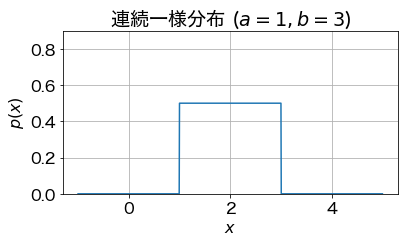

In [2]:
def continuous_uniform(x, a, b):
    return np.array([1/(b-a) if (a<=i)&(i<=b) else 0 for i in x])

a, b = 1, 3
x = np.linspace(-1, 5, 1000)
p_x = continuous_uniform(x, a, b)

plt.figure(figsize=(6, 3))
plt.plot(x, p_x)
plt.title("連続一様分布 ($a=1, b=3$)")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.ylim(0, 0.9)
plt.grid()
plt.show()

## 正規分布
---
### 概要
- 最も重要な分布.
- $\mu=0, \sigma^2=1$ の場合を特に**標準正規分布**という.

### 密度関数
$$
\begin{align*}
p\left(x|\mu, \sigma^2\right) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\lbrace{-\frac{(x-\mu)^2}{2\sigma^2}}\right\rbrace,\quad -\infty<x<\infty
\end{align*}
$$

### 平均
$$
\begin{align*}
\mathrm{E}[x] &= \int_{-\infty}^{\infty} x \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\lbrace{-\frac{(x-\mu)^2}{2\sigma^2}}\right\rbrace \mathrm{d}x \\
&= \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} x \exp\left\lbrace{-\frac{(x-\mu)^2}{2\sigma^2}}\right\rbrace \mathrm{d}x \\
&= \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} (x-\mu) \exp\left\lbrace{-\frac{(x-\mu)^2}{2\sigma^2}}\right\rbrace \mathrm{d}x +
\frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} \mu \exp\left\lbrace{-\frac{(x-\mu)^2}{2\sigma^2}}\right\rbrace \mathrm{d}x
\end{align*}
$$

第2項について, $p(x)$ は正規化されているので,

$$
\begin{align*}
\frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} \mu \exp\left\lbrace{-\frac{(x-\mu)^2}{2\sigma^2}}\right\rbrace \mathrm{d}x &= \mu\int_{-\infty}^{\infty} p(x) \mathrm{d}x  \\
&= \mu
\end{align*}
$$

となる. また, 第1項は $x-\mu=t$ とおくと, $f(t)=t\exp\left\lbrace{-\frac{t^2}{2\sigma^2}}\right\rbrace$ は奇関数なので,

$$
\begin{align*}
\frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} t \exp\left\lbrace{-\frac{t^2}{2\sigma^2}}\right\rbrace \mathrm{d}t &= 0\\ 
\end{align*}
$$

$$
\begin{align*}
\therefore \mathrm{E}[x] = 0 + \mu = \mu
\end{align*}
$$


### 分散
$$
\begin{align*}
\mathrm{Var}[x] &= \int_{-\infty}^{\infty} (x-\mu)^2 \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\lbrace{-\frac{(x-\mu)^2}{2\sigma^2}}\right\rbrace \mathrm{d}x \\
&= \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} (x-\mu)^2 \exp\left\lbrace{-\frac{(x-\mu)^2}{2\sigma^2}}\right\rbrace \mathrm{d}x \\
\end{align*}
$$

$x-\mu=t$ とおくと, 部分積分及びガウス積分を用いて,

$$
\begin{align*}
\mathrm{Var}[x] &= \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} t^2 \exp\left\lbrace{-\frac{t^2}{2\sigma^2}}\right\rbrace \mathrm{d}t \\
&= \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} t \cdot t\exp\left\lbrace{-\frac{t^2}{2\sigma^2}}\right\rbrace \mathrm{d}t \\
&= \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{\infty} t \left(-\sigma^2 \exp\left\lbrace{-\frac{t^2}{2\sigma^2}}\right\rbrace  \right)^{\prime} \mathrm{d}t \\
&= \frac{1}{\sqrt{2\pi\sigma^2}} \left\lbrace \left[ -t\sigma^2 \exp\left\lbrace{-\frac{t^2}{2\sigma^2}}\right\rbrace \right]^\infty_{-\infty} + 
\sigma^2 \int_{-\infty}^{\infty} \exp\left\lbrace{-\frac{t^2}{2\sigma^2}}\right\rbrace \mathrm{d}t \right\rbrace \\
&= \frac{1}{\sqrt{2\pi\sigma^2}} \left(0 + \sigma^2\sqrt{2\pi\sigma^2}\right) \\
&= \sigma^2
\end{align*}
$$

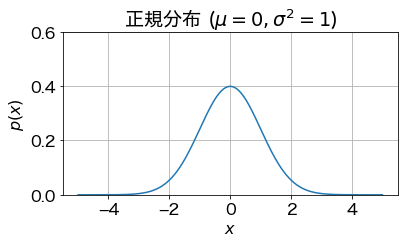

In [3]:
def normal(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)/sigma**2)**2/2)

mu, sigma = 0, 1
x = np.linspace(-5, 5, 1000)
p_x = normal(x, mu, sigma)

plt.figure(figsize=(6, 3))
plt.plot(x, p_x)
plt.title(f"正規分布 ($\mu={mu}, \sigma^2={sigma**2}$)")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.ylim(0, 0.6)
plt.grid()
plt.show()

## ガンマ分布
---
### 概要
- 非負の実数数直線上の確率分布の中で代表的な確率分布.
- 指数分布, カイ2乗分布の一般系.

### 密度関数
$$
\begin{align*}
p\left(x|\alpha, \beta\right) = \frac{1}{\Gamma{(\alpha)}} \frac{1}{\beta} \left(\frac{x}{\beta}\right)^{\alpha-1}  \mathrm{e}^{-\frac{x}{\beta}},\quad x>0
\end{align*}
$$

### 平均
$$
\begin{align*}
\mathrm{E}[x] &= \int_{0}^{\infty} x \frac{1}{\Gamma{(\alpha)}} \frac{1}{\beta} \left(\frac{x}{\beta}\right)^{\alpha-1} \mathrm{e}^{-\frac{x}{\beta}} \mathrm{d}x\\
&= \frac{1}{\Gamma{(\alpha)}} \frac{1}{\beta^{\alpha}} \int_{0}^{\infty} x^{\alpha} \mathrm{e}^{-\frac{x}{\beta}} \mathrm{d}x
\end{align*}
$$

$u=\frac{x}{\beta}$ とおくと, ガンマ関数の形ができる.

$$
\begin{align*}
\mathrm{E}[x] &= \frac{1}{\Gamma{(\alpha)}} \frac{1}{\beta^{\alpha}} \int_{0}^{\infty} (\beta u)^{\alpha} \mathrm{e}^{-u} \beta \mathrm{d}u \\
&= \frac{\beta}{\Gamma{(\alpha)}} \int_{0}^{\infty} u^{\alpha} \mathrm{e}^{-u}\mathrm{d}u \\
&= \frac{\beta}{\Gamma{(\alpha)}} \Gamma{(\alpha+1)} \\
&= \alpha\beta
\end{align*}
$$

### 分散
$$
\begin{align*}
\mathrm{E}[x^2] &= \int_{0}^{\infty} x^2 \frac{1}{\Gamma{(\alpha)}} \frac{1}{\beta} \left(\frac{x}{\beta}\right)^{\alpha-1} \mathrm{e}^{-\frac{x}{\beta}} \mathrm{d}x \\
&= \frac{1}{\Gamma{(\alpha)}} \frac{1}{\beta^{\alpha}} \int_{0}^{\infty} x^{\alpha+1} \mathrm{e}^{-\frac{x}{\beta}} \mathrm{d}x
\end{align*}
$$

同様に $u=\frac{x}{\beta}$ とおくと,

$$
\begin{align*}
\mathrm{E}[x^2] &= \frac{1}{\Gamma{(\alpha)}} \frac{1}{\beta^{\alpha}} \int_{0}^{\infty} (\beta u)^{\alpha+1} \mathrm{e}^{-u} \beta \mathrm{d}u \\
&= \frac{\beta^2}{\Gamma{(\alpha)}} \int_{0}^{\infty} u^{\alpha+1} \mathrm{e}^{-u}\mathrm{d}u \\
&= \frac{\beta^2}{\Gamma{(\alpha)}} \Gamma{(\alpha+2)} \\
&= \frac{\beta^2}{\Gamma{(\alpha)}} (\alpha+1)\alpha\Gamma{(\alpha)} \\
&= (\alpha+1)\alpha\beta^2
\end{align*}
$$

となるので,

$$
\begin{align*}
\mathrm{Var}[x] &= \mathrm{E}[x^2] - \mathrm{E}[x]^2 \\
&= (\alpha+1)\alpha\beta^2 - (\alpha\beta)^2 \\
&= (\alpha^2+\alpha-\alpha^2)\beta^2 \\
&= \alpha\beta^2
\end{align*}
$$

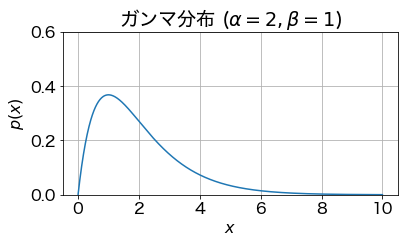

In [4]:
def gamma_dist(x, alpha, beta):
    return 1/(gamma(alpha)*beta)*(x/beta)**(alpha-1)*np.exp(-x/beta)

alpha, beta = 2, 1
x = np.linspace(0, 10, 1000)
p_x = gamma_dist(x, alpha, beta)

plt.figure(figsize=(6, 3))
plt.plot(x, p_x)
plt.title(fr"ガンマ分布 ($\alpha={alpha}, \beta={beta}$)")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.ylim(0, 0.6)
plt.grid()
plt.show()

## カイ2乗分布
---
### 概要
- ガンマ分布の特殊な場合.
    - $\alpha=\frac{n}{2}, \beta=2$
- 確率変数 $Z$ が $\mathcal{N}(0, 1)$ に従う時, $Z^2$ が $\chi_1^2$ に従う.

### 密度関数
$$
\begin{align*}
p(x) = \frac{1}{\Gamma{\left(\frac{n}{2}\right)}} \left(\frac{1}{2}\right)^{\frac{n}{2}} x^{\frac{n}{2}-1}  \mathrm{e}^{-\frac{x}{2}},\quad x>0
\end{align*}
$$

### 平均
ガンマ分布の結果に $\alpha=\frac{n}{2}, \beta=2$ を代入.
$$
\begin{align*}
\mathrm{E}[x] &= \alpha\beta \\
&= \frac{n}{2} \cdot 2 \\
&= n
\end{align*}
$$

### 分散
同様に,
$$
\begin{align*}
\mathrm{Var}[x] &= \alpha\beta^2 \\
&= \frac{n}{2} \cdot 2^2 \\
&= 2n
\end{align*}
$$

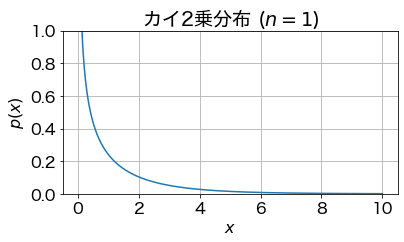

In [5]:
n = 1 # 自由度
alpha, beta = n/2, 2
x = np.linspace(0.01, 10, 1000)
p_x = gamma_dist(x, alpha, beta)

plt.figure(figsize=(6, 3))
plt.plot(x, p_x)
plt.title(fr"カイ2乗分布 ($n={n}$)")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.ylim(0, 1)
plt.grid()
plt.show()